### Recently I published a self help book titled Inspiration: Thoughts on Spirituality, Technology, Wealth, Leadership and Motivation. The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

### You can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code


In this notebook we will discuss about dimensionality reduction.We will be using Principle Component Analysis for this.After we manage to reduce the dimensions in our dataset then we will make use of the reduced dimensions for making our predictions.In this notebook we will be covering following things.

1.Data Import and Preprocessing

2.Exploratory Data Analysis

3.Principle Component Analysis

4.Logistic Regression

5.Model Evaluation

6.Vizualisation of Predictions

7.Conclusion

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# 1.Data Import and Preprocessing

### Importing Python Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
df=pd.read_csv('../input/iris/Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


We see there are names of the Iris Species in the data set.We will use label encoding to convert the Species Data into numeric data.

### Dropping Column

In [4]:
df = df.drop('Id',axis=1)
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


The Column on Id wont have any impact on the class of the flower.So we can drop it.

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Label Encoding 

In [6]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

So we have converted the Species column into numeric data.

### Creating matrix of features

In [7]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values
#X

### Splitting data into test train

In [8]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### Shape Of Data 

In [10]:
X_train.shape

(120, 4)

# 2.Exploratory Data Analysis 

# 3.Principle Component Analysis

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [12]:
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

We see that the the first two principal components 0.36 +0.19 = 0.55 .So we will consider the first two components.

### Scores

In [13]:
scores = X_train 
scores_df = pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4'])
scores_df.head(2)

,PC1,PC2,PC3,PC4
0,1.272282,0.357879,0.180337,-0.218684
1,0.152232,-0.299835,0.657130,-0.249321


### Calling DataDrame Variables

In [14]:
scores_df['PC1'].head(2)

0    1.272282
1    0.152232
Name: PC1, dtype: float64

### Labeling the Dataframe

In [15]:
y_label = []

for i in y:
    if i == 0:
        y_label.append("Setosa")
    elif i == 1:
        y_label.append("Versicolor")
    else:
        y_label.append("Virginica")
        
Wines = pd.DataFrame(y_label,columns=['Species'])

df_scores = pd.concat([scores_df,Wines],axis=1)
df_scores.head()

,PC1,PC2,PC3,PC4,Species
0,1.272282,0.357879,0.180337,-0.218684,Setosa
1,0.152232,-0.299835,0.657130,-0.249321,Setosa
2,-2.187642,0.617154,-0.180887,0.003670,Setosa
3,0.941913,0.012181,0.329616,-0.012393,Setosa
4,1.762278,-0.271066,0.336679,0.092995,Setosa


### Explained Variance Ratio 

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.72226528, 0.23974795])

In [17]:
np.identity(X.shape[1])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
components=pca.transform(np.identity(X.shape[1]))

In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
pd.DataFrame(components,columns=['pc_1','pc_2'],index=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

,pc_1,pc_2
SepalLengthCm,1.000000e+00,1.480297e-17
SepalWidthCm,4.810966e-17,1.000000e+00
PetalLengthCm,4.810966e-17,-3.182639e-16
PetalWidthCm,4.810966e-17,1.258253e-16


# 4.Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Predicting the test set results

In [22]:
y_pred=classifier.predict(X_test)

# 5.Model Evaluation

### Confusion Matrix

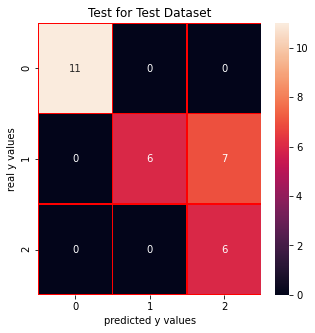

In [23]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

### Classification Report

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



### Accuracy Score

In [25]:
print(accuracy_score(y_test,y_pred))

0.7666666666666667


# 6.Visualising the Prediction

### Vizualizing training set results

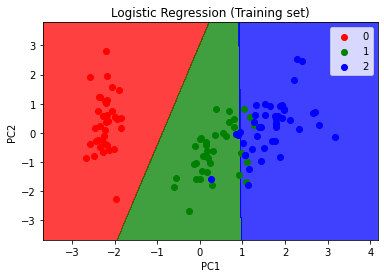

In [26]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Vizualization of test set results

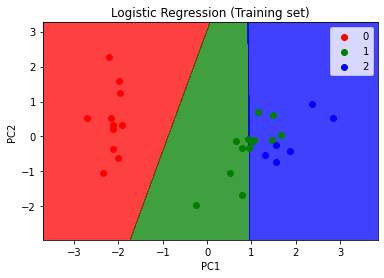

In [27]:

from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# 6.Conclusion

1.In this Notebook we have demonstrated how to reduce the dimentionality of Data using Principle Component Analyis

2.Out of four features we have used two features to make our final Prediction using Logistic Regression

3.This is just a demonstration on how to do ensembele machine learning using PCA + Logistic Regression 

4.This technique will be more useful when we have very high number of features in our data set.

# TO BE CONTINUED